Backtesting Mean Reversion Strategy. For test purposes will trade Amazon (AMZN)

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

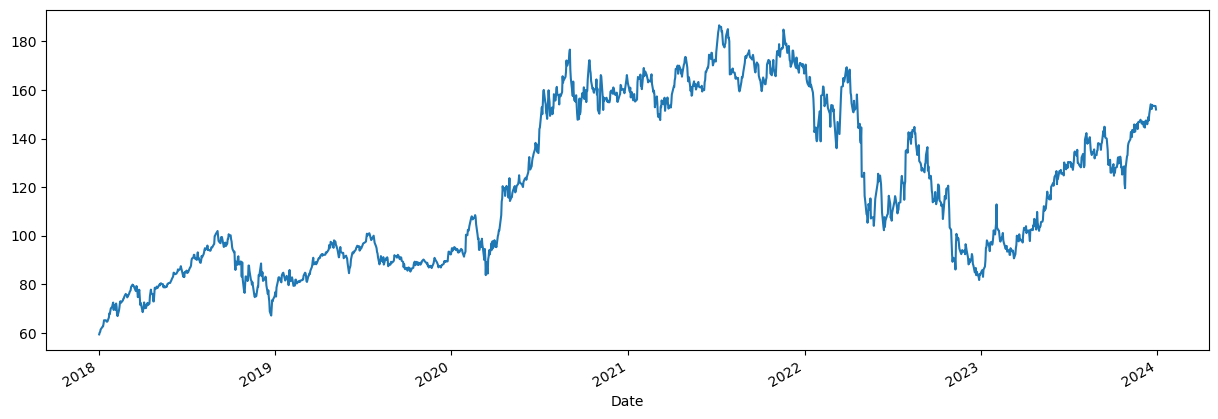

In [18]:
ticker = "AMZN"
df = yf.download(ticker, start="2018-01-01", end="2024-01-01")
df['Close'].plot(figsize=(15, 5))

In [19]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


<Axes: xlabel='Date'>

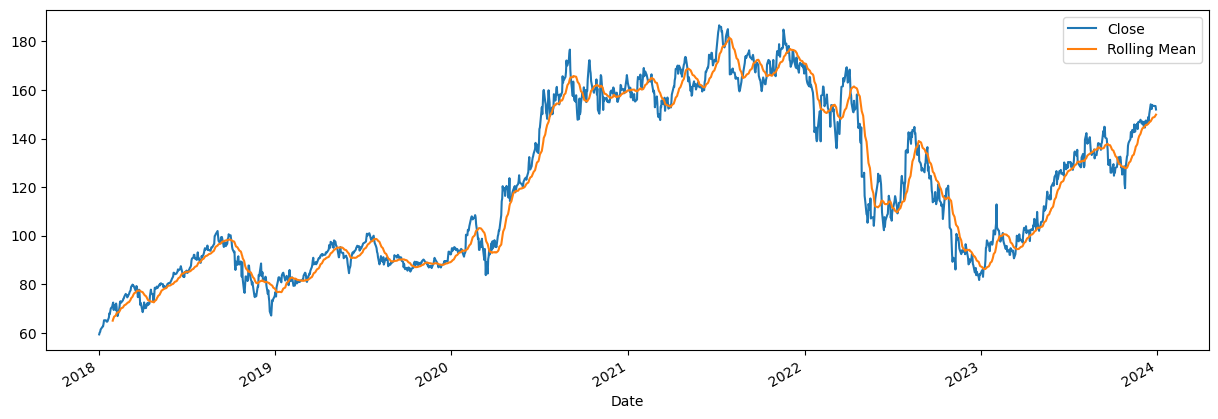

In [20]:
window = 20
df['Rolling Mean'] = df['Close'].rolling(window=window).mean()
df['Rolling Std'] = df['Close'].rolling(window=window).std()
df[['Close', 'Rolling Mean']].plot(figsize=(15, 5))

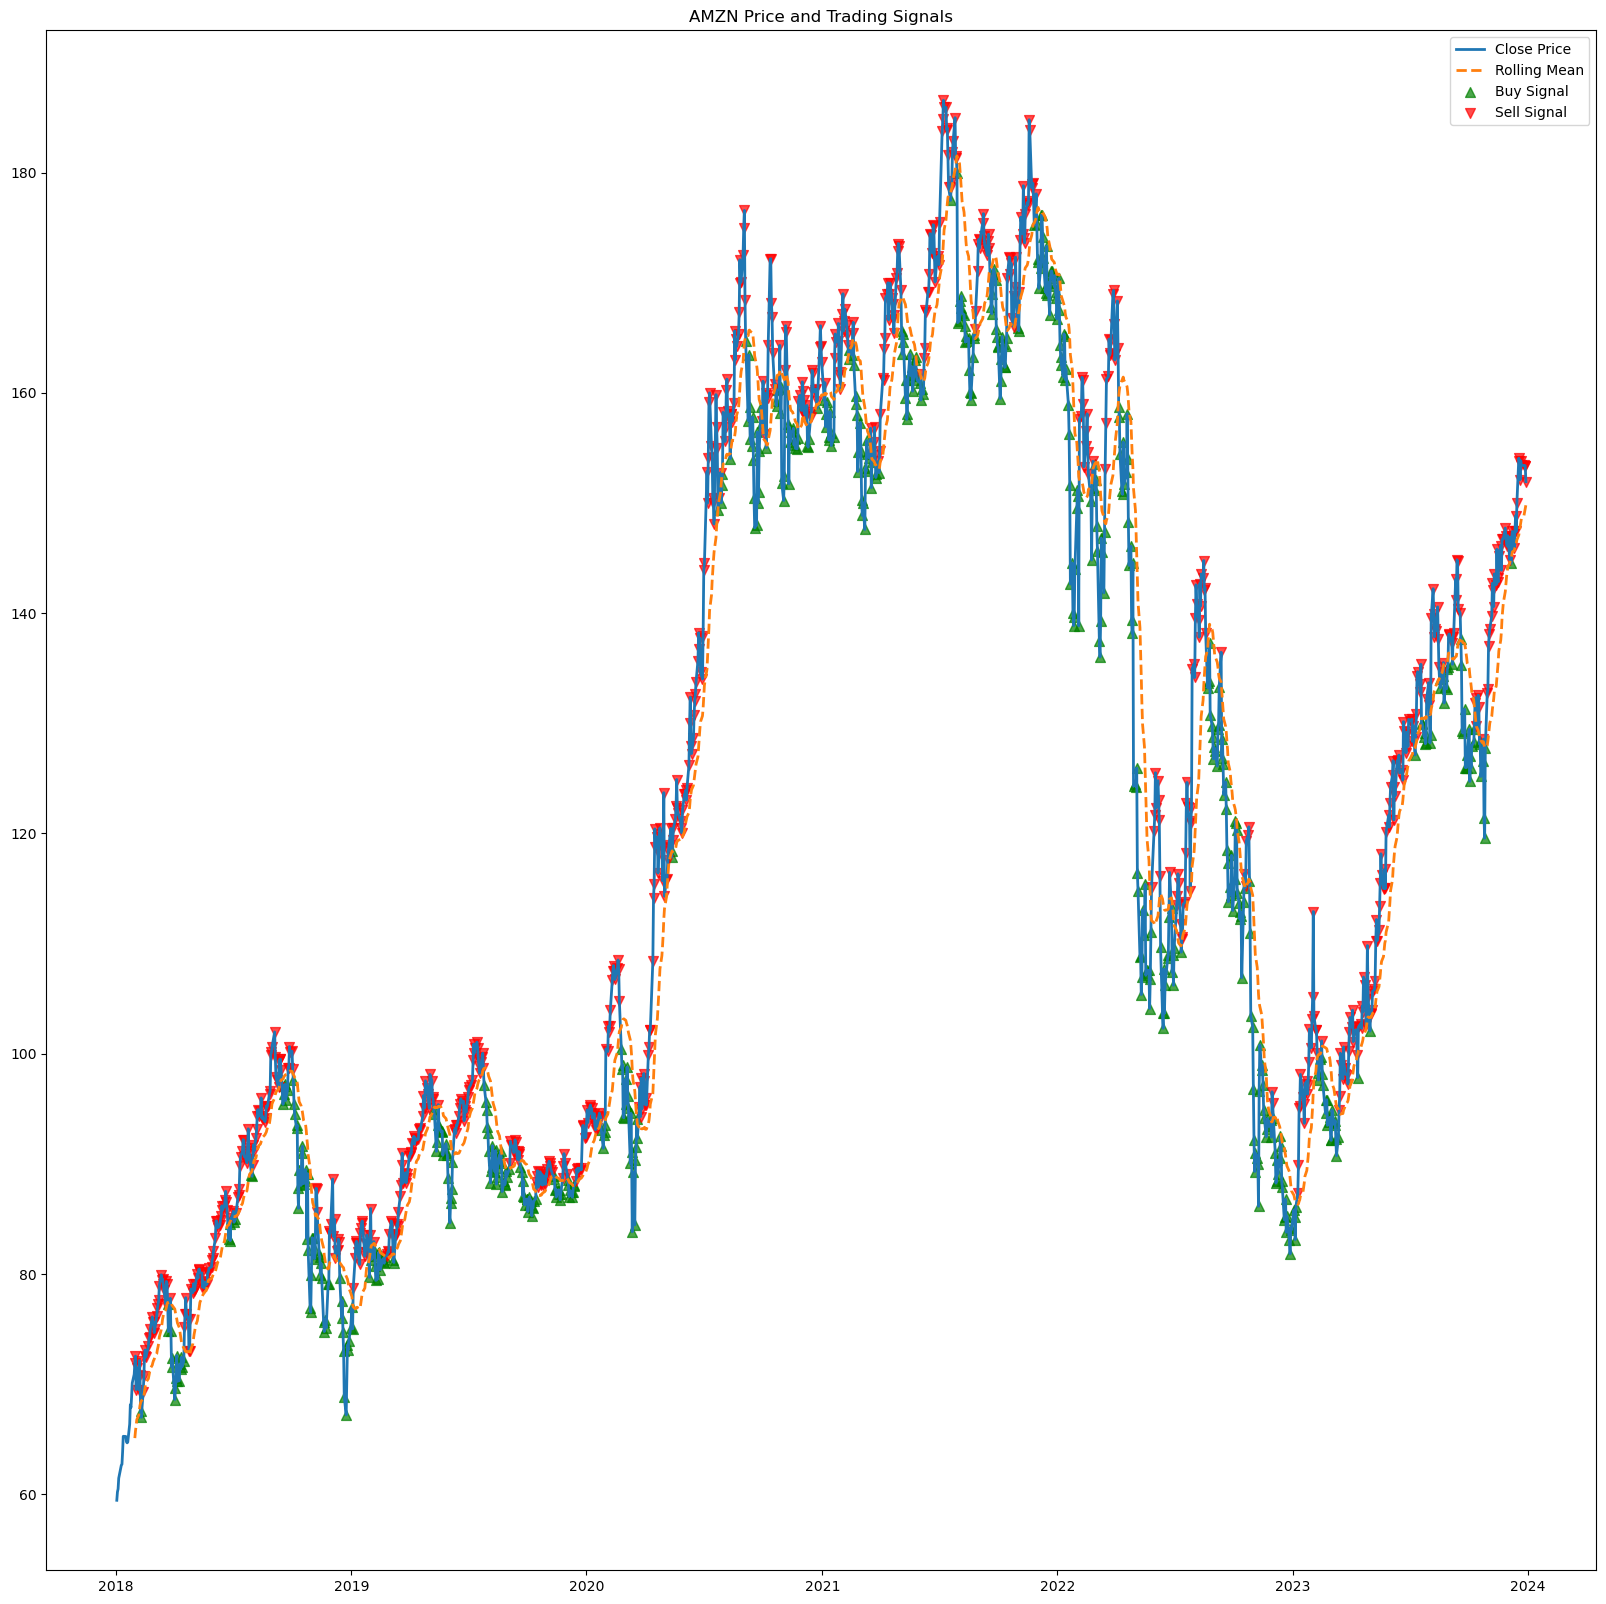

In [21]:
df['Buy Signal'] = df['Close'] < df['Rolling Mean']
df['Sell Signal'] = df['Close'] > df['Rolling Mean']

plt.figure(figsize=(20, 20))
plt.plot(df['Close'], label='Close Price', linewidth=2)
plt.plot(df['Rolling Mean'], label='Rolling Mean', linestyle='--', linewidth=2)
plt.scatter(df.index[df['Buy Signal']], df['Close'][df['Buy Signal']], label='Buy Signal', marker='^', color='g', s=50, alpha=0.7)
plt.scatter(df.index[df['Sell Signal']], df['Close'][df['Sell Signal']], label='Sell Signal', marker='v', color='r', s=50, alpha=0.7)
plt.title(f'{ticker} Price and Trading Signals')
plt.legend()
plt.show()

In [22]:
initial_cash = 100000
cash = initial_cash
shares = 0
for date, row in df.iterrows():
    if row['Buy Signal']:
        shares = cash // row['Close']
        cash -= shares * row['Close']
    elif row['Sell Signal'] and shares > 0:
        cash += shares * row['Close']
        shares = 0
# portfolio value
final_value = cash + shares * df['Close'][-1]
print(f'Initial Cash: ${initial_cash}')
print(f'Final Portfolio Value: ${final_value:.2f}')

Initial Cash: $100000
Final Portfolio Value: $63.00


In [23]:
returns = df['Close'].pct_change()
strategy_returns = returns[df['Buy Signal'].shift(1) | df['Sell Signal'].shift(1)]

# calculate performance metrics
mean_return = strategy_returns.mean()
std_dev = strategy_returns.std()
sharpe_ratio = mean_return / std_dev * (252**0.5) 

print(f'Mean Return: {mean_return:.4f}')
print(f'Standard Deviation: {std_dev:.4f}')
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')

Mean Return: 0.0008
Standard Deviation: 0.0224
Sharpe Ratio: 0.5342
